#Exploratory Data Analysis

##1. Import Libraries



In [ ]:
## Code
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io 
import numpy as np

##2. Pandas to read data

In [ ]:
## Code
from google.colab import files
uploaded = files.upload()

Saving wine_fraud.csv to wine_fraud.csv


In [ ]:
## Reading into Pandas
df = pd.read_csv(io.BytesIO(uploaded['wine_fraud.csv']))

##3. Check out info(), head(), and describe() methods

In [ ]:
## Code
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


##4. Unique Variables in Target column trying to predict

In [ ]:
'''
The unique variables in the target column that we are trying to predict are 
"Fraud" or "Legit". Our SVM algorithm has to determine if the quality of the 
wine is legit or fraud
'''

'\nThe unique variables in the target column that we are trying to predict are \n"Fraud" or "Legit". Our SVM algorithm has to determine if the quality of the \nwine is legit or fraud\n'

##5. Create a Countplot displaying count per category of legit vs fraud

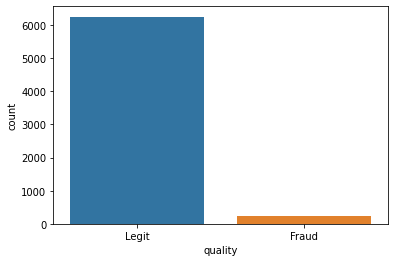

In [ ]:
## Code
sns.countplot(x ='quality', data = df)

##6. If there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine type on the x axis with the hue separating columns by Fraud vs Legit.



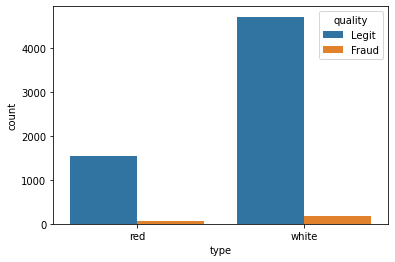

In [ ]:
## Code
sns.countplot(x ='type', data = df, hue='quality')

##7. Calculate the correlation between the various features and the "quality" column

In [ ]:
# Mapping 
x = df['quality'].map({'Fraud' :0, "Legit" :1})

corr_include = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 
  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density' ,'pH' ,
  'sulphates' ,'alcohol']

# Looping throught the whole list 
for i in corr_include:
  print(f"Correlation between {i} and quality is: {x.corr(df[i],method='pearson', min_periods=1)}")

Correlation between fixed acidity and quality is: -0.021793964775441776
Correlation between volatile acidity and quality is: -0.1512279759169286
Correlation between citric acid and quality is: 0.06178945964802487
Correlation between residual sugar and quality is: 0.048755956220890774
Correlation between chlorides and quality is: -0.034499464374472814
Correlation between free sulfur dioxide and quality is: 0.0852043291592975
Correlation between total sulfur dioxide and quality is: 0.03525239569530775
Correlation between density and quality is: -0.01635128392005596
Correlation between pH and quality is: -0.020107271414857
Correlation between sulphates and quality is: 0.03404620619711476
Correlation between alcohol and quality is: 0.051140736441686714


##8. Create a bar plot of the correlation values to Fraudlent wine.

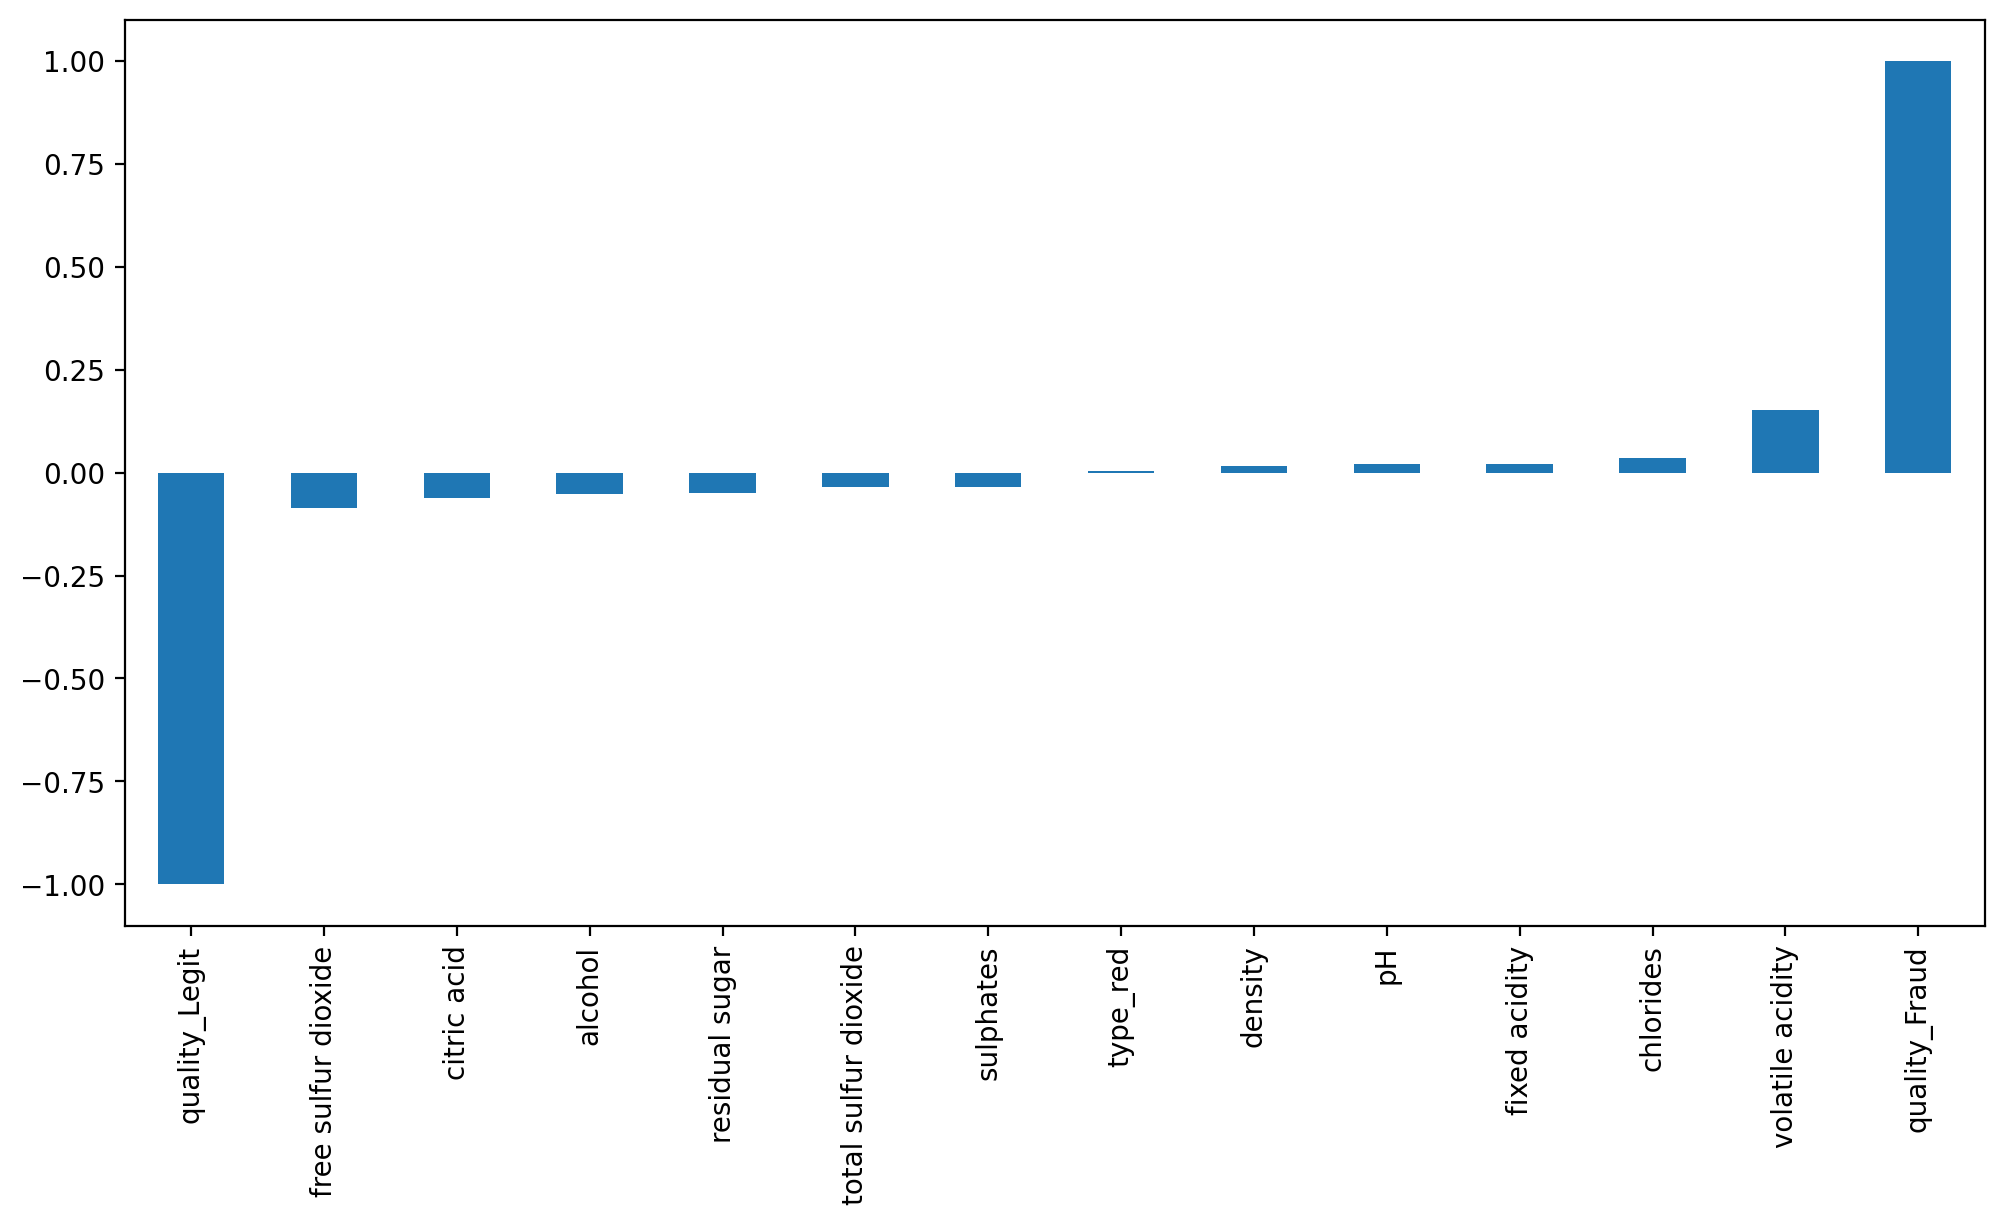

In [ ]:
# Drawing a Bar Graph
plt.figure(figsize=(12,6), dpi=200)

dummy_data = pd.get_dummies(df)
dummy_data.corr()['quality_Fraud'].iloc[:-1].sort_values().plot(kind='bar')

# Machine Learning Model (SVM)

##9. Convert the categorical column "type" from a string or "red" or "white" to dummy variables

In [ ]:
data = pd.get_dummies(dummy_data, columns =['type_red', 'type_white'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality_Fraud         6497 non-null   uint8  
 12  quality_Legit         6497 non-null   uint8  
 13  type_red_0            6497 non-null   uint8  
 14  type_red_1            6497 non-null   uint8  
 15  type_white_0         

##10.	Separate out the data into X features and y target label ("quality" column)

In [ ]:
data["quality"] = data["quality_Fraud"] + data["quality_Legit"]
X = data.drop(['quality_Fraud'], axis=1)
y = data['quality_Fraud']


##11.	Perform a Train|Test split on the data, with a 10% test size.

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

##12.	Scale the X train and X test data.

In [ ]:
# Perform Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## 13. Creating an instance of a Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.model_selection import GridSearchCV
model = SVC(C=0.5)
model.fit(scaled_X_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##14.	Use a GridSearchCV to run a grid search for the best C and gamma parameters.

In [ ]:
# Defining the Options for the GridSearch 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
  
# Running the GridSearch
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
grid.fit(X_train, y_train)

print(grid.best_params_) 
 # We see the best value to select is 0.1

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.3s finished


##15.	Display the confusion matrix and classification report for your model.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
grid_preds = grid.predict(X_test) 
confusion_matrix(y_test, grid_preds)
plot_confusion_matrix(grid_preds, scaled_X_test,y_test)

## Classification Report
print(classification_report(y_test, grid_preds))

In [ ]:
## 16 - This model performed better than the KMeans classifier for the Penguin.
## This model is useable but realistically I would not suggest it

#Machine Learning (DT)

##17.	Create an instance of a Decision Tree classifier to predict X_test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##18. Display Confusion Matrix and Classification Report

<function confusion_matrix at 0x7fe896cc1710>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       623
           1       1.00      1.00      1.00        27

    accuracy                           1.00       650
   macro avg       1.00      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650



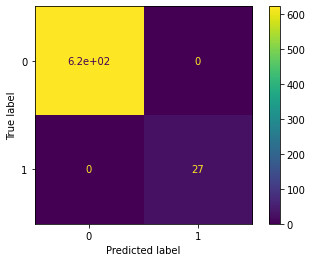

In [ ]:
## Confusion Matrix
base_prediction = model.predict(X_test)
confusion_matrix(y_test, base_prediction)
print(confusion_matrix)
plot_confusion_matrix(model, X_test, y_test)

## Classification Report
print(classification_report(y_test, base_prediction))

##19. Model Review

In [ ]:
'''
This model is basically good too however there are just too many features for it to run effectively. 
The model is not completely recommended
'''

'\nThis model is basically good too however there are just too many features for it to run effectively. \nThe model is not completely recommended\n'